# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
import json, pickle

import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import load_model
from utils.recommendation import *
from dataset.dataset_padchest import *

In [4]:
@tf.function()
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], config['model']['latent_dim']), mean=0., stddev=0.1)
    return z_mean + tf.math.exp(z_log_sigma) * epsilon

# Data load

In [5]:
with open('', 'r') as f:
    config = json.load(f)

In [6]:
data = Dataset(config)

with open(config["PATHS"]["IMAGES_PATH"] + "", 'rb') as f:
    data = pickle.load(f)

# Accuracy analysis

In [7]:
BASE_PATH = ''

models = [
          # Classifiers
          BASE_PATH + 'results_padchest_v1_Classifier/models/',
          BASE_PATH + 'results_padchest_v11_Classifier/models/',
          BASE_PATH + 'results_padchest_v111_Classifier/models/',

          # AEs
          BASE_PATH + 'results_padchest_v1_AE/models/',
          BASE_PATH + 'results_padchest_v11_AE/models/',
          BASE_PATH + 'results_padchest_v111_AE/models/',

          # MOCAEs
          BASE_PATH + 'results_padchest_v1_MOCAE/models/',
          BASE_PATH + 'results_padchest_v2_MOCAE/models/',
          BASE_PATH + 'results_padchest_v3_MOCAE/models/',
          BASE_PATH + 'results_padchest_v4_MOCAE/models/',
          BASE_PATH + 'results_padchest_v5_MOCAE/models/',
          BASE_PATH + 'results_padchest_v11_MOCAE/models/',
          BASE_PATH + 'results_padchest_v22_MOCAE/models/',
          BASE_PATH + 'results_padchest_v33_MOCAE/models/',
          BASE_PATH + 'results_padchest_v44_MOCAE/models/',
          BASE_PATH + 'results_padchest_v55_MOCAE/models/',
          BASE_PATH + 'results_padchest_v111_MOCAE/models/',
          BASE_PATH + 'results_padchest_v222_MOCAE/models/',
          BASE_PATH + 'results_padchest_v333_MOCAE/models/',
          BASE_PATH + 'results_padchest_v444_MOCAE/models/',
          BASE_PATH + 'results_padchest_v555_MOCAE/models/',

          # MOCVAEs
          BASE_PATH + 'results_padchest_v1_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v2_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v3_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v4_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v5_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v11_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v22_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v33_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v44_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v55_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v111_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v222_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v333_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v444_MOCVAE/models/',
          BASE_PATH + 'results_padchest_v555_MOCVAE/models/',
          ]

In [14]:
acc_mean_dict = {}
acc_stddev_dict = {}

for model_path in models:

    encoder = load_model(model_path + 'e_best_encoder.h5', custom_objects={'sampling': sampling})
    
    model_name = os.path.normpath(model_path).split('/')[5]
    
    acc_mean_dict[model_name] = []
    acc_stddev_dict[model_name] = []
    
    
    print("\n-----Model ", model_name, "-----")
    for k in [3,4,5,10]:
        if model_name[-6:] == 'MOCVAE':
            res_class = get_recom_results(data, encoder, n_imgs=500, n_neighbors=k, vae=True)
        else:
            res_class = get_recom_results(data, encoder, n_imgs=500, n_neighbors=k)

        acc_mean, acc_stddev = get_recom_acc(res_class)

        print("Model accuracy with k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)
        
        acc_mean_dict[model_name].append(acc_mean)
        acc_stddev_dict[model_name].append(acc_stddev)
    
df_acc_mean = pd.DataFrame.from_dict(acc_mean_dict, orient='index', columns=[3, 4, 5, 10])
df_acc_stddev = pd.DataFrame.from_dict(acc_stddev_dict, orient='index', columns=[3, 4, 5, 10])


-----Model  results_padchest_v1_Classifier -----
Model accuracy with k= 3  neighbors:  51.933333333333366  +- 33.70848887479565
Model accuracy with k= 4  neighbors:  50.6  +- 30.978056749899597
Model accuracy with k= 5  neighbors:  49.8  +- 29.488302765673033
Model accuracy with k= 10  neighbors:  47.04  +- 24.544620591893448

-----Model  results_padchest_v11_Classifier -----
Model accuracy with k= 3  neighbors:  51.800000000000004  +- 34.109040834750346
Model accuracy with k= 4  neighbors:  51.35  +- 30.934244778238888
Model accuracy with k= 5  neighbors:  50.44  +- 28.799416660758947
Model accuracy with k= 10  neighbors:  48.9  +- 24.26911617673787

-----Model  results_padchest_v111_Classifier -----
Model accuracy with k= 3  neighbors:  52.86666666666666  +- 34.296161106844984
Model accuracy with k= 4  neighbors:  52.35  +- 31.555150134328308
Model accuracy with k= 5  neighbors:  51.04  +- 29.28
Model accuracy with k= 10  neighbors:  49.52  +- 25.879907264130605

-----Model  results

Model accuracy with k= 3  neighbors:  48.999999999999986  +- 32.81429227909354
Model accuracy with k= 4  neighbors:  47.9  +- 29.716830248194373
Model accuracy with k= 5  neighbors:  47.64  +- 27.799827337593303
Model accuracy with k= 10  neighbors:  45.4  +- 22.970415755923963

-----Model  results_padchest_v444_MOCAE -----
Model accuracy with k= 3  neighbors:  41.666666666666664  +- 30.61408535661685
Model accuracy with k= 4  neighbors:  41.5  +- 27.527259217001607
Model accuracy with k= 5  neighbors:  42.04  +- 26.226673445177905
Model accuracy with k= 10  neighbors:  41.22  +- 19.347134154701052

-----Model  results_padchest_v555_MOCAE -----
Model accuracy with k= 3  neighbors:  37.199999999999996  +- 31.66743858708289
Model accuracy with k= 4  neighbors:  36.3  +- 27.51926597858308
Model accuracy with k= 5  neighbors:  36.6  +- 25.02079135439165
Model accuracy with k= 10  neighbors:  36.62  +- 18.771670144129423


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '



-----Model  results_padchest_v1_MOCVAE -----
Model accuracy with k= 3  neighbors:  53.13333333333334  +- 34.46679561549057
Model accuracy with k= 4  neighbors:  52.25  +- 31.483130403439873
Model accuracy with k= 5  neighbors:  51.32  +- 30.210223435122092
Model accuracy with k= 10  neighbors:  49.12  +- 25.448489149652872

-----Model  results_padchest_v2_MOCVAE -----
Model accuracy with k= 3  neighbors:  51.9333333333333  +- 34.74727807085518
Model accuracy with k= 4  neighbors:  51.9  +- 31.48634624722278
Model accuracy with k= 5  neighbors:  50.56  +- 29.672991086171276
Model accuracy with k= 10  neighbors:  48.94  +- 24.476037260961995

-----Model  results_padchest_v3_MOCVAE -----
Model accuracy with k= 3  neighbors:  47.99999999999997  +- 32.971368050341965
Model accuracy with k= 4  neighbors:  47.1  +- 29.691581298408476
Model accuracy with k= 5  neighbors:  46.88  +- 27.695949162287256
Model accuracy with k= 10  neighbors:  45.16  +- 22.382457416467926

-----Model  results_padc

<AxesSubplot:>

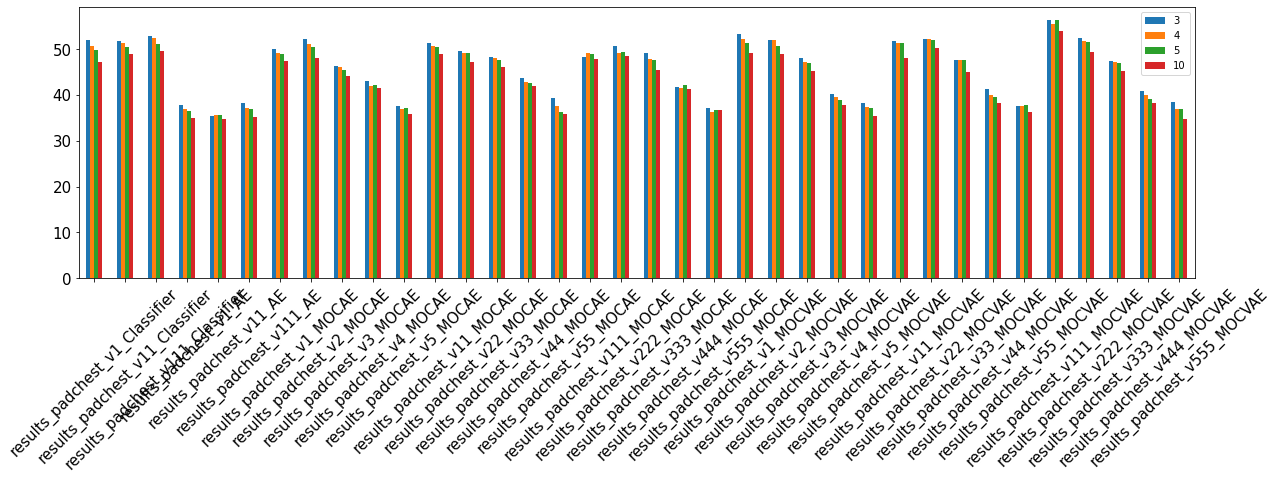

In [15]:
df_acc_mean.plot.bar(figsize=(20, 5), rot=45, fontsize=15)

In [16]:
df_acc_mean

,3,4,5,10
results_padchest_v1_Classifier,51.933333,50.60,49.80,47.04
results_padchest_v11_Classifier,51.800000,51.35,50.44,48.90
results_padchest_v111_Classifier,52.866667,52.35,51.04,49.52
results_padchest_v1_AE,37.800000,36.90,36.48,34.96
results_padchest_v11_AE,35.466667,35.50,35.56,34.72
results_padchest_v111_AE,38.200000,37.15,36.80,35.26
results_padchest_v1_MOCAE,49.933333,49.20,48.88,47.44
results_padchest_v2_MOCAE,52.066667,51.15,50.44,48.00
results_padchest_v3_MOCAE,46.200000,46.10,45.36,44.14
results_padchest_v4_MOCAE,43.066667,41.90,42.20,41.56


In [17]:
df_acc_stddev

,3,4,5,10
results_padchest_v1_Classifier,33.708489,30.978057,29.488303,24.544621
results_padchest_v11_Classifier,34.109041,30.934245,28.799417,24.269116
results_padchest_v111_Classifier,34.296161,31.555150,29.280000,25.879907
results_padchest_v1_AE,28.983597,25.756358,24.008532,17.233642
results_padchest_v11_AE,28.904133,25.975950,23.295630,17.678280
results_padchest_v111_AE,31.210468,26.946753,24.383601,18.103381
results_padchest_v1_MOCAE,34.091315,30.811686,29.413358,24.187732
results_padchest_v2_MOCAE,33.302586,29.998792,27.925014,23.647410
results_padchest_v3_MOCAE,32.947838,29.576849,27.306966,21.869166
results_padchest_v4_MOCAE,30.817311,27.007221,24.346663,19.338211


# Distance analysis

In [8]:
was_mean_dict = {}
was_stddev_dict = {}

for model_path in models:

    encoder = load_model(model_path + 'e_best_encoder.h5', custom_objects={'sampling': sampling})
    
    model_name = os.path.normpath(model_path).split('/')[5]
    
    was_mean_dict[model_name] = []
    was_stddev_dict[model_name] = []
    
    print("\n-----Model ", model_name, "-----")
    for k in [3,4,5,10]:
        if model_name[-6:] == 'MOCVAE':
            res_class = get_distance_results(data, encoder, n_imgs=500, n_neighbors=k, vae=True)
        else:
            res_class = get_distance_results(data, encoder, n_imgs=500, n_neighbors=k)

        acc_mean, acc_stddev = get_dist_acc(res_class)

        print("Model wasserstein distance k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)
        
        was_mean_dict[model_name].append(acc_mean)
        was_stddev_dict[model_name].append(acc_stddev)
    
df_was_mean = pd.DataFrame.from_dict(was_mean_dict, orient='index', columns=[3, 4, 5, 10])
df_was_stddev = pd.DataFrame.from_dict(was_stddev_dict, orient='index', columns=[3, 4, 5, 10])


-----Model  results_padchest_v1_Classifier -----
Model wasserstein distance k= 3  neighbors:  0.4679068939414543  +- 0.15770344423500487
Model wasserstein distance k= 4  neighbors:  0.4728286290059219  +- 0.154766246791462
Model wasserstein distance k= 5  neighbors:  0.4795507312334642  +- 0.14840361555647658
Model wasserstein distance k= 10  neighbors:  0.5031800432313287  +- 0.15647485430255823

-----Model  results_padchest_v11_Classifier -----
Model wasserstein distance k= 3  neighbors:  0.4822067014871555  +- 0.1624091505071231
Model wasserstein distance k= 4  neighbors:  0.48654102107087865  +- 0.15519189854276785
Model wasserstein distance k= 5  neighbors:  0.4951032399126481  +- 0.15403878011153974
Model wasserstein distance k= 10  neighbors:  0.5208202692937214  +- 0.15943637559269913

-----Model  results_padchest_v111_Classifier -----
Model wasserstein distance k= 3  neighbors:  0.49190143356759547  +- 0.1601408848317919
Model wasserstein distance k= 4  neighbors:  0.49908672

Model wasserstein distance k= 10  neighbors:  0.49911225988416613  +- 0.21173011255005608

-----Model  results_padchest_v111_MOCAE -----
Model wasserstein distance k= 3  neighbors:  0.47899224409992847  +- 0.17065728186211537
Model wasserstein distance k= 4  neighbors:  0.4887988845222293  +- 0.17030981565638062
Model wasserstein distance k= 5  neighbors:  0.4933317504755997  +- 0.16573263233538446
Model wasserstein distance k= 10  neighbors:  0.5242981122519583  +- 0.17469022472422077

-----Model  results_padchest_v222_MOCAE -----
Model wasserstein distance k= 3  neighbors:  0.4477195955641409  +- 0.1637513609836357
Model wasserstein distance k= 4  neighbors:  0.4588076480090953  +- 0.16477102820027759
Model wasserstein distance k= 5  neighbors:  0.46759175177451623  +- 0.16075224379012099
Model wasserstein distance k= 10  neighbors:  0.49413008832339195  +- 0.1680528372831812

-----Model  results_padchest_v333_MOCAE -----
Model wasserstein distance k= 3  neighbors:  0.434477395786331

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '



-----Model  results_padchest_v1_MOCVAE -----
Model wasserstein distance k= 3  neighbors:  0.47662894529054534  +- 0.16272878696095294
Model wasserstein distance k= 4  neighbors:  0.48840718117841414  +- 0.15979886664870122
Model wasserstein distance k= 5  neighbors:  0.49474926007403053  +- 0.16104680471315053
Model wasserstein distance k= 10  neighbors:  0.5223571562502014  +- 0.16868457446891805

-----Model  results_padchest_v2_MOCVAE -----
Model wasserstein distance k= 3  neighbors:  0.45096321368155257  +- 0.15545424413331757
Model wasserstein distance k= 4  neighbors:  0.4577202418996704  +- 0.15431108612764916
Model wasserstein distance k= 5  neighbors:  0.46367860396682775  +- 0.15472121183694218
Model wasserstein distance k= 10  neighbors:  0.48896155709511474  +- 0.15093688343985584

-----Model  results_padchest_v3_MOCVAE -----
Model wasserstein distance k= 3  neighbors:  0.41944325857553  +- 0.14939629290817052
Model wasserstein distance k= 4  neighbors:  0.4278391473975583 

<AxesSubplot:>

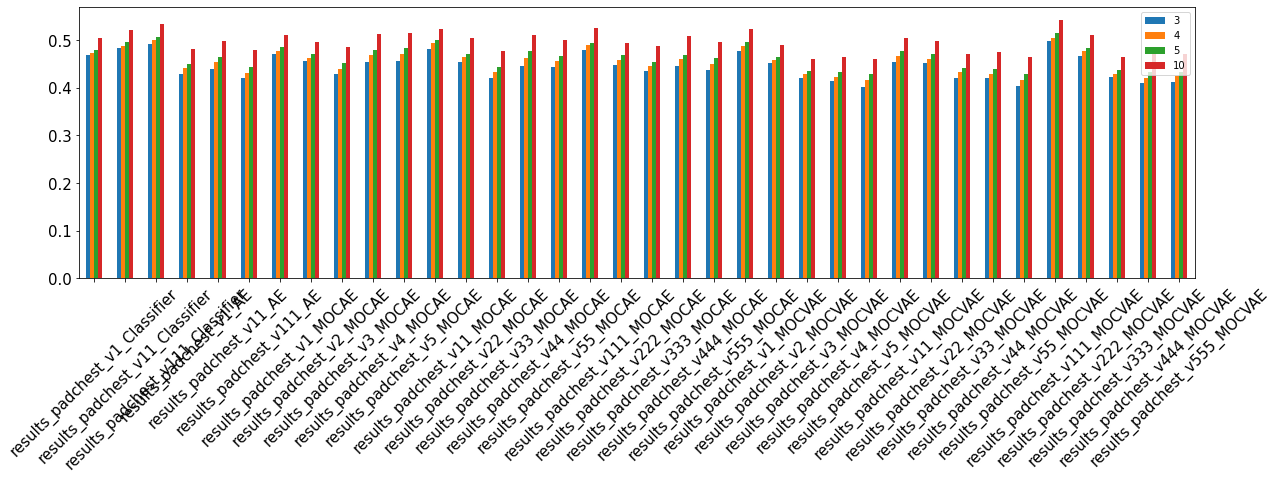

In [9]:
df_was_mean.plot.bar(figsize=(20, 5), rot=45, fontsize=15)

In [10]:
df_was_mean

,3,4,5,10
results_padchest_v1_Classifier,0.467907,0.472829,0.479551,0.503180
results_padchest_v11_Classifier,0.482207,0.486541,0.495103,0.520820
results_padchest_v111_Classifier,0.491901,0.499087,0.506049,0.533866
results_padchest_v1_AE,0.427913,0.440332,0.450069,0.480303
results_padchest_v11_AE,0.440010,0.453814,0.463543,0.498833
results_padchest_v111_AE,0.420570,0.431539,0.442511,0.479069
results_padchest_v1_MOCAE,0.469632,0.477265,0.484855,0.510511
results_padchest_v2_MOCAE,0.455194,0.462632,0.470603,0.496444
results_padchest_v3_MOCAE,0.429601,0.439757,0.451186,0.484812
results_padchest_v4_MOCAE,0.453955,0.468008,0.478579,0.511540


In [11]:
df_was_stddev

,3,4,5,10
results_padchest_v1_Classifier,0.157703,0.154766,0.148404,0.156475
results_padchest_v11_Classifier,0.162409,0.155192,0.154039,0.159436
results_padchest_v111_Classifier,0.160141,0.153431,0.152461,0.160279
results_padchest_v1_AE,0.158785,0.156193,0.156270,0.157677
results_padchest_v11_AE,0.179092,0.180410,0.175712,0.189111
results_padchest_v111_AE,0.166633,0.172107,0.171860,0.187433
results_padchest_v1_MOCAE,0.169368,0.165175,0.165380,0.163909
results_padchest_v2_MOCAE,0.169055,0.167470,0.166640,0.170121
results_padchest_v3_MOCAE,0.176644,0.168075,0.170656,0.184863
results_padchest_v4_MOCAE,0.210885,0.214910,0.216103,0.220891
